# 1. Imports

In [1]:
import numpy as np
import pandas as pd
import regex as re

import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
final_feature_df = pd.read_pickle('final_feature_df.pkl')
print(len(final_feature_df))
final_feature_df.head()

969857


,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,...,speech_length,age,gender,tenure,topic,main_category,sub_category,Stadt,Former Country,City Classification
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,546,57.0,männlich,0.0,NaN,NaN,NaN,Erfurt,former GDR,Large City
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,-1,Guest,präsident des bundesrats,-1,...,45,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,895,57.0,männlich,0.0,NaN,NaN,NaN,Erfurt,former GDR,Large City
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,-1,Guest,bundespräsident,-1,...,24,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,49,57.0,männlich,0.0,NaN,NaN,NaN,Erfurt,former GDR,Large City


In [3]:
sentiments_df = pd.read_pickle('../sentiment/content_df_features_sentiment.pkl')

#rename column sentiment_score_2 to net_sentiment_score
sentiments_df.rename(columns={'sentiment_score_2':'net_sentiment_score', 'sentiment_score_2_positivity':'positivity_sentiment', 'sentiment_score_2_negativity':'negativity_sentiment'}, inplace=True)

sentiments_df

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,...,age,gender,tenure,topic,main_category,sub_category,sentiment_score_1,net_sentiment_score,positivity_sentiment,negativity_sentiment
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,57.0,männlich,0.000000,NaN,NaN,NaN,0.000000,0.047619,0.047619,0.000000
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,-1,Guest,präsident des bundesrats,-1,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,57.0,männlich,0.000000,NaN,NaN,NaN,0.133946,0.181818,0.212121,0.030303
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,-1,Guest,bundespräsident,-1,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,1.000000,1.000000,0.000000
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,57.0,männlich,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969852,1094071,20,201,thomas,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,lutze,7,Member of Parliament,None,11004103,...,55.0,männlich,14.734247,Arbeit: Mindestlohn,Work,Mindestlohn,0.132517,0.063492,0.154762,0.091270
969853,1094072,20,201,bärbel,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,bas,-1,Presidium of Parliament,Präsidentin,11004006,...,56.0,weiblich,14.830137,No Topic,no topic,None,0.000000,0.307692,0.307692,0.000000
969854,1094073,20,201,wilfried,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,oellers,5,Member of Parliament,None,11004365,...,49.0,männlich,10.690411,Sozialpolitik,Social Policy,None,0.135320,0.055385,0.132308,0.076923
969855,1094074,20,201,bärbel,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,bas,-1,Presidium of Parliament,Präsidentin,11004006,...,56.0,weiblich,14.830137,No Topic,no topic,None,0.000000,0.000000,0.142857,0.142857


In [4]:
bert_results = pd.read_pickle('../LLM_Results/final_results_BERT_id.pkl')
print(len(bert_results))

# drop columns
bert_results.drop(columns=['id_0', 'id'], inplace=True)

# rename columns
bert_results.rename(columns={'sentiment_score':'net_sentiment_score', 'sentiment_score_positivity':'positivity_sentiment', 'sentiment_score_negativity':'negativity_sentiment'}, inplace=True)

#rearrancge columns
bert_results = bert_results[['id_new', 'split_speeches', 'predicted_polarizing']]
bert_results.reset_index(drop=True, inplace=True)

bert_results.head()

709864


,id_new,split_speeches,predicted_polarizing
0,17_1_729471_1,"Herr Alterspräsident, ich schlage für die CDU/...",0
1,17_1_729474_1,"Herr Präsident, ich nehme die Wahl gerne an.",0
2,17_1_729478_1,"Herr Präsident, ich nehme die Wahl gerne an un...",0
3,17_1_729480_1,"Ja, ich nehme die Wahl an.",0
4,17_1_729482_1,Ich bedanke mich. Ich nehme die Wahl gerne an.,0


In [5]:
bert_results_delta = pd.read_pickle('../LLM_Results/final_results_delta_BERT.pkl')
# rename id to id_new
bert_results_delta.rename(columns={'id':'id_new'}, inplace=True)
bert_results_delta.reset_index(drop=True, inplace=True)

print(len(bert_results_delta))
bert_results_delta.head()

9417


,id_new,split_speeches,predicted_polarizing
0,20_188_1070578_1delta,"Frau Präsidentin!, Liebe Kolleginnen und Kolle...",0
1,20_188_1070578_2delta,"Seit 2014 sind wir Stufe um Stufe, Rang um Ran...",0
2,20_188_1070578_3delta,"Unsere Aufgabe als Politiker ist es dabei, bes...",0
3,20_188_1070578_4delta,"Reicht das, um das Ruder rumzureißen?, Ich bin...",0
4,20_188_1070578_5delta,Ich bin der Bundesregierung – insbesondere dem...,0


In [6]:
# conncat bert_results and bert_results_delta
bert_results = pd.concat([bert_results, bert_results_delta])
len(bert_results)

719281

In [7]:
gpt_results_17 = pd.read_excel('../LLM_Results/response_4o_mini_final_17.xlsx')
gpt_results_17.head()

,id,split_speeches,polarizing_4o_mini
0,17_1_729471_1,"Herr Alterspräsident, ich schlage für die CDU/...",0
1,17_1_729474_1,"Herr Präsident, ich nehme die Wahl gerne an.",0
2,17_1_729478_1,"Herr Präsident, ich nehme die Wahl gerne an un...",0
3,17_1_729480_1,"Ja, ich nehme die Wahl an.",0
4,17_1_729482_1,Ich bedanke mich. Ich nehme die Wahl gerne an.,0


In [8]:
gpt_results_18 = pd.read_excel('../LLM_Results/response_4o_mini_final_18.xlsx')
gpt_results_18.head()

,id,split_speeches,polarizing_4o_mini
0,18_1_794027_1,"Herr Alterspräsident, ich schlage im Namen der...",0
1,18_1_794030_1,"Herr Alterspräsident, lieber Kollege Riesenhub...",0
2,18_1_794033_1,Sehr geehrter Herr Präsident! Liebe Kolleginne...,0
3,18_1_794033_2,"Ich erinnere an 1994, als den Grünen kein Stel...",0
4,18_1_794033_3,Das Bundestagspräsidium ist ein wichtiger Teil...,0


In [9]:
gpt_results_19 = pd.read_excel('../LLM_Results/response_4o_mini_final_19.xlsx')
gpt_results_19.head()

,id,split_speeches,polarizing_4o_mini
0,19_1_1045489_1,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,0
1,19_1_1045489_2,"Nur dann, wenn sich die Bürgerinnen und Bürger...",0
2,19_1_1045489_3,"Ihr Politikstil, Frau Merkel, ist ein Grund da...",1
3,19_1_1045489_4,"Er braucht keine Regierung, um zu arbeiten – i...",0
4,19_1_1045489_5,Doch wir wollen heute nach vorne schauen. Desh...,0


In [10]:
gpt_results_20 = pd.read_excel('../LLM_Results/response_4o_mini_final_20.xlsx')
gpt_results_20.head()

,id,split_speeches,polarizing_4o_mini
0,20_1_1066957_1,Sehr geehrter Herr Alterspräsident! So muss ic...,0
1,20_1_1066959_1,Nicht lange; da haben Sie schon recht. – Liebe...,0
2,20_1_1066959_2,Sie ist nicht in Stein gemeißelt – das wissen ...,0
3,20_1_1066959_3,Wir begrüßen auch ausdrücklich die Initiative ...,0
4,20_1_1066959_4,"Wir plädieren allerdings auch dafür, dass wir ...",0


In [11]:
gpt_results_delta = pd.read_pickle('../LLM_Results/response_4o_mini_final_delta.pkl')
print(len(gpt_results_delta))
gpt_results_delta.head()

9417


,id,split_speeches,polarizing_4o_mini
0,20_188_1070578_1delta,"Frau Präsidentin!, Liebe Kolleginnen und Kolle...",0
1,20_188_1070578_2delta,"Seit 2014 sind wir Stufe um Stufe, Rang um Ran...",0
2,20_188_1070578_3delta,"Unsere Aufgabe als Politiker ist es dabei, bes...",0
3,20_188_1070578_4delta,"Reicht das, um das Ruder rumzureißen?, Ich bin...",0
4,20_188_1070578_5delta,Ich bin der Bundesregierung – insbesondere dem...,0


In [12]:
gpt_results = pd.concat([gpt_results_17, gpt_results_18, gpt_results_19, gpt_results_20, gpt_results_delta])

print(len(gpt_results))
gpt_results.head()

719537


,id,split_speeches,polarizing_4o_mini
0,17_1_729471_1,"Herr Alterspräsident, ich schlage für die CDU/...",0
1,17_1_729474_1,"Herr Präsident, ich nehme die Wahl gerne an.",0
2,17_1_729478_1,"Herr Präsident, ich nehme die Wahl gerne an un...",0
3,17_1_729480_1,"Ja, ich nehme die Wahl an.",0
4,17_1_729482_1,Ich bedanke mich. Ich nehme die Wahl gerne an.,0


In [13]:
llama_results_20 = pd.read_csv('../LLM_Results/WP20_LLAMA.csv', index_col=0)
llama_results_20

,id,LLAMA
0,20_1_1066957_1,0
1,20_1_1066959_1,0
2,20_1_1066959_2,0
3,20_1_1066959_3,0
4,20_1_1066959_4,0
...,...,...
150642,20_187_1075926_1,1
150643,20_187_1075926_2,0
150644,20_187_1075926_3,0
150645,20_187_1075926_4,0


In [14]:
llama_results_19 = pd.read_csv('../LLM_Results/WP19_LLAMA.csv', index_col=0)
llama_results_19

,id,LLAMA
0,19_1_1045489_1,0
1,19_1_1045489_2,0
2,19_1_1045489_3,1
3,19_1_1045489_4,0
4,19_1_1045489_5,0
...,...,...
183113,19_239_1013334_2,0
183114,19_239_1013334_3,0
183115,19_239_1013334_4,1
183116,19_239_1013334_5,0


In [15]:
llama_results_18 = pd.read_csv('../LLM_Results/WP18_LLAMA.csv', index_col=0)
llama_results_18

,id,LLAMA
0,18_1_794027_1,0
1,18_1_794030_1,0
2,18_1_794033_1,0
3,18_1_794033_2,0
4,18_1_794033_3,0
...,...,...
163072,18_245_846683_2,0
163073,18_245_846683_3,0
163074,18_245_846683_4,0
163075,18_245_846683_5,0


In [16]:
llama_results_17 = pd.read_csv('../LLM_Results/WP17_LLAMA.csv', index_col=0)
llama_results_17

,id,LLAMA
0,17_1_729471_1,0
1,17_1_729474_1,0
2,17_1_729478_1,0
3,17_1_729480_1,0
4,17_1_729482_1,0
...,...,...
213017,17_253_794024_14,0
213018,17_253_794024_15,1
213019,17_253_794024_16,0
213020,17_253_794024_17,1


In [17]:
llama_results_delta = pd.read_csv('../LLM_Results/llama_delta.csv')
print(len(llama_results_delta))
llama_results_delta

9417


,id,LLAMA
0,20_188_1070578_1delta,0
1,20_188_1070578_2delta,0
2,20_188_1070578_3delta,0
3,20_188_1070578_4delta,0
4,20_188_1070578_5delta,0
...,...,...
9412,20_201_1094075_6delta,0
9413,20_201_1094075_7delta,0
9414,20_201_1094075_8delta,1
9415,20_201_1094075_9delta,0


In [18]:
llama_results = pd.concat([llama_results_17, llama_results_18, llama_results_19, llama_results_20, llama_results_delta])
print(len(llama_results))
llama_results

719281


,id,LLAMA
0,17_1_729471_1,0
1,17_1_729474_1,0
2,17_1_729478_1,0
3,17_1_729480_1,0
4,17_1_729482_1,0
...,...,...
9412,20_201_1094075_6delta,0
9413,20_201_1094075_7delta,0
9414,20_201_1094075_8delta,1
9415,20_201_1094075_9delta,0


# 1.1 Mapping old and new ids and dates

In [19]:
# read pickle
old_ids = pd.read_pickle('../content_df_features_topic.pkl')
old_ids = old_ids[old_ids['electoral_term'] >= 17]

In [20]:
old_ids.reset_index(drop=True, inplace=True)
len(old_ids)

237070

In [21]:
new_ids = pd.read_pickle('final_feature_df.pkl')
new_ids = new_ids[new_ids['electoral_term'] >= 17]

In [22]:
new_ids = new_ids.reset_index(drop=True)
len(new_ids)

240881

In [23]:
# mege onld and new ids on index
id_mapping = old_ids.merge(new_ids, left_index=True,right_index=True, how='right', suffixes=('_old', '_new'))


# check whether speech_content is the same
id_mapping['speech_content_equal'] = id_mapping['speech_content_old'] == id_mapping['speech_content_new']


In [24]:
date_mapping= id_mapping.copy()
date_mapping['date_equal'] = date_mapping['date_new'] == date_mapping['date_old']

# drop all nan
date_mapping = date_mapping.dropna(subset=['date_old', 'date_new'])
date_mapping[date_mapping['date_equal'] == False]

# show electoral term old 17 and 18, where date_equal is true
date_mapping[(date_mapping['electoral_term_old'] == 18) & (date_mapping['date_equal'] == True)]
date_mapping = date_mapping[['date_equal','date_old', 'date_new', 'id_new']]

In [25]:
# count tue and false speech content equal
id_mapping['speech_content_equal'].value_counts()

True     237070
False      3811
Name: speech_content_equal, dtype: int64

In [26]:
# show all columns
pd.set_option('display.max_columns', None)

# show false
check = id_mapping[id_mapping['speech_content_equal'] == False][['electoral_term_old','session_old','session_new','electoral_term_new','id_old', 'id_new', 'speech_content_old', 'speech_content_new']]

# show where values of electoral_term ols are not nan
check[check['electoral_term_old'].notnull()]

id_mapping = id_mapping[['id_old', 'id_new','speech_content_equal']]

# drop all rows there id_old is nan
id_mapping = id_mapping[id_mapping['id_old'].notnull()]

id_mapping['id_old']=id_mapping['id_old'].astype('Int64').astype(str)

id_mapping

,id_old,id_new,speech_content_equal
0,729470,729470,True
1,729471,729471,True
2,729472,729472,True
3,729473,729473,True
4,729474,729474,True
...,...,...,...
237065,1075922,1076376,True
237066,1075923,1076377,True
237067,1075924,1076378,True
237068,1075925,1076379,True


In [27]:
# look up id_old 1092152
id_mapping[id_mapping['id_old'] == '1092152']

,id_old,id_new,speech_content_equal
181318,1092152,1094116,True


# 2. Calculation of Polarization Scores

In [28]:
# show all duplicates of id for gpt results
duplicates_gpt = gpt_results[gpt_results['id'].duplicated(keep=False)].sort_values('id')
duplicates_gpt

gpt_results = gpt_results.drop_duplicates(subset='id', keep='first')
# rename polarizing_4o_mini
gpt_results = gpt_results.rename(columns={'polarizing_4o_mini': 'gpt'})
len(gpt_results)

719281

In [29]:
# rename column in bert_re
bert_results = bert_results.rename(columns={'predicted_polarizing': 'bert'})
llama_results = llama_results.rename(columns={'LLAMA': 'llama'})

In [30]:
# merge bert_results and gpt_results on id_new
bert_results['id'] = bert_results['id_new'].astype(str)
gpt_results['id'] = gpt_results['id'].astype(str)
llama_results_20['id'] = llama_results_20['id'].astype(str)

all_scores = pd.merge(bert_results, gpt_results[['gpt','id']], on='id', how='outer')
all_scores = pd.merge(all_scores, llama_results[['llama', 'id']], on='id', how='outer')

# drop column id_new
all_scores = all_scores.drop(columns=['id_new'])

# create new column with 'old ids if id does not contain delta
all_scores

,split_speeches,bert,id,gpt,llama
0,"Herr Alterspräsident, ich schlage für die CDU/...",0,17_1_729471_1,0,0
1,"Herr Präsident, ich nehme die Wahl gerne an.",0,17_1_729474_1,0,0
2,"Herr Präsident, ich nehme die Wahl gerne an un...",0,17_1_729478_1,0,0
3,"Ja, ich nehme die Wahl an.",0,17_1_729480_1,0,0
4,Ich bedanke mich. Ich nehme die Wahl gerne an.,0,17_1_729482_1,0,0
...,...,...,...,...,...
719276,"Das ist nicht immer leicht, weil diese Terrori...",0,20_193_1081632_3delta,0,1
719277,"Das war richtig so, das ist richtig so, und da...",0,20_193_1081632_4delta,0,0
719278,In vielen Gesprächen haben wir über Monate ver...,0,20_193_1081632_5delta,0,0
719279,Israel ist die stärkste Demokratie in der Regi...,0,20_193_1081632_6delta,0,0


In [31]:
#split column id into electoral term, session, speech_id and speach_id_number
all_scores[['electoral_term', 'session', 'speech_id', 'speech_id_number']] = all_scores['id'].str.split('_', expand=True)
all_scores['speech_id'].astype(str)
all_scores['is_new_id'] = all_scores['speech_id_number'].str.contains('delta')

# if new id False, replace with new id from matching list
id_mapping['id_old'] = id_mapping['id_old'].astype(str)
all_scores = all_scores.merge(id_mapping[['id_new', 'id_old']], left_on='speech_id', right_on='id_old', how='left')

# if is_new_id it False, replace speech_id with new id
all_scores['speech_id'] = np.where(all_scores['is_new_id'] == False, all_scores['id_new'], all_scores['speech_id'])
all_scores

,split_speeches,bert,id,gpt,llama,electoral_term,session,speech_id,speech_id_number,is_new_id,id_new,id_old
0,"Herr Alterspräsident, ich schlage für die CDU/...",0,17_1_729471_1,0,0,17,1,729471,1,False,729471,729471
1,"Herr Präsident, ich nehme die Wahl gerne an.",0,17_1_729474_1,0,0,17,1,729474,1,False,729474,729474
2,"Herr Präsident, ich nehme die Wahl gerne an un...",0,17_1_729478_1,0,0,17,1,729478,1,False,729478,729478
3,"Ja, ich nehme die Wahl an.",0,17_1_729480_1,0,0,17,1,729480,1,False,729480,729480
4,Ich bedanke mich. Ich nehme die Wahl gerne an.,0,17_1_729482_1,0,0,17,1,729482,1,False,729482,729482
...,...,...,...,...,...,...,...,...,...,...,...,...
719276,"Das ist nicht immer leicht, weil diese Terrori...",0,20_193_1081632_3delta,0,1,20,193,1081632,3delta,True,1083228,1081632
719277,"Das war richtig so, das ist richtig so, und da...",0,20_193_1081632_4delta,0,0,20,193,1081632,4delta,True,1083228,1081632
719278,In vielen Gesprächen haben wir über Monate ver...,0,20_193_1081632_5delta,0,0,20,193,1081632,5delta,True,1083228,1081632
719279,Israel ist die stärkste Demokratie in der Regi...,0,20_193_1081632_6delta,0,0,20,193,1081632,6delta,True,1083228,1081632


In [32]:
# sort columns
all_scores = all_scores[['electoral_term', 'session', 'speech_id', 'speech_id_number', 'id', 'bert', 'gpt', 'llama']]

all_scores['added_scores'] = all_scores['bert'] + all_scores['gpt'] + all_scores['llama']
# create a column polarizing if added_scores larger than 1
all_scores['polarizing_amount'] = np.where(all_scores['added_scores'] > 1, 1, 0)

all_scores

,electoral_term,session,speech_id,speech_id_number,id,bert,gpt,llama,added_scores,polarizing_amount
0,17,1,729471,1,17_1_729471_1,0,0,0,0,0
1,17,1,729474,1,17_1_729474_1,0,0,0,0,0
2,17,1,729478,1,17_1_729478_1,0,0,0,0,0
3,17,1,729480,1,17_1_729480_1,0,0,0,0,0
4,17,1,729482,1,17_1_729482_1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
719276,20,193,1081632,3delta,20_193_1081632_3delta,0,0,1,1,0
719277,20,193,1081632,4delta,20_193_1081632_4delta,0,0,0,0,0
719278,20,193,1081632,5delta,20_193_1081632_5delta,0,0,0,0,0
719279,20,193,1081632,6delta,20_193_1081632_6delta,0,0,0,0,0


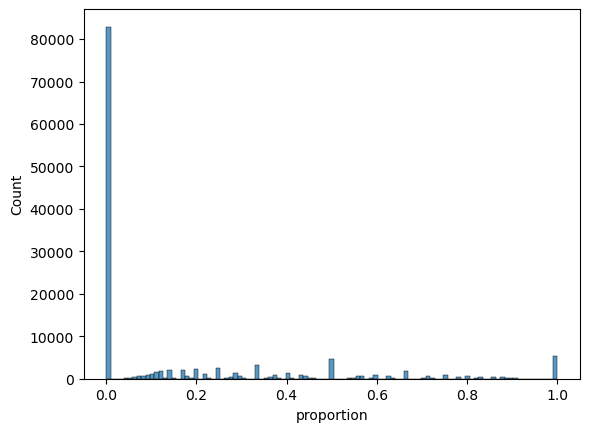

,electoral_term,speech_id,polarizing_amount,id,proportion
0,17,729471,0,1,0.000000
1,17,729474,0,1,0.000000
2,17,729478,0,1,0.000000
3,17,729480,0,1,0.000000
4,17,729482,0,1,0.000000
...,...,...,...,...,...
133159,20,1114444,0,5,0.000000
133160,20,1114446,1,6,0.166667
133161,20,1114447,0,3,0.000000
133162,20,1114449,4,4,1.000000


In [33]:
# group by speech_id, count polarizing speeches
scores_grouped = all_scores.groupby(["electoral_term", "speech_id"]).agg({"polarizing_amount":"sum", "id":"count"}).reset_index()
scores_grouped['proportion'] = scores_grouped['polarizing_amount']/scores_grouped['id']

# convert speech_id into int
scores_grouped['speech_id'] = scores_grouped['speech_id'].astype(int)
scores_grouped

# show distibution of polarizing speeches
sns.histplot(scores_grouped['proportion'])
plt.show()
scores_grouped

In [34]:
scores_grouped['polarizing']=scores_grouped['proportion']>0.5
print(len(scores_grouped))
scores_grouped

133164


,electoral_term,speech_id,polarizing_amount,id,proportion,polarizing
0,17,729471,0,1,0.000000,False
1,17,729474,0,1,0.000000,False
2,17,729478,0,1,0.000000,False
3,17,729480,0,1,0.000000,False
4,17,729482,0,1,0.000000,False
...,...,...,...,...,...,...
133159,20,1114444,0,5,0.000000,False
133160,20,1114446,1,6,0.166667,False
133161,20,1114447,0,3,0.000000,False
133162,20,1114449,4,4,1.000000,True


In [35]:
# change 'polarizing score for id 1092152 to 0
scores_grouped.loc[scores_grouped['speech_id'] == 1094116, 'polarizing'] = False

In [36]:
# calculate percentage of polarizing speeches
polarizing_percentage = scores_grouped.groupby('electoral_term')['polarizing'].mean()
polarizing_percentage

electoral_term
17    0.085104
18    0.059471
19    0.147872
20    0.178921
Name: polarizing, dtype: float64

In [37]:
# contn amoint of polarizing speeches for all_scores dataframe for gpt bert and llama for electoral term 18
all_scores_18 = all_scores[all_scores['electoral_term']=='18']
print(len(all_scores_18))

# sum polarizing speeches for bert, gpt and llama
bert_scores_18 = all_scores_18['bert'].sum()
gpt_scores_18 = all_scores_18['gpt'].sum()
llama_scores_18 = all_scores_18['llama'].sum()

print(bert_scores_18, gpt_scores_18, llama_scores_18)

all_scores_19 = all_scores[all_scores['electoral_term']=='19']
print(len(all_scores_19))

bert_scores_19 = all_scores_19['bert'].sum()
gpt_scores_19 = all_scores_19['gpt'].sum()
llama_scores_19 = all_scores_19['llama'].sum()

print(bert_scores_19, gpt_scores_19, llama_scores_19)

163077
18640 24880 27652
183118
37814 47466 43382


# 3. Merge with feature df

In [38]:
final_feature_df_sent = pd.merge(final_feature_df, sentiments_df[['id', 'net_sentiment_score', 'positivity_sentiment', 'negativity_sentiment']], on='id', how='left')
len(final_feature_df_sent)   
final_feature_df_sent

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date,faction,year,speech_length,age,gender,tenure,topic,main_category,sub_category,Stadt,Former Country,City Classification,net_sentiment_score,positivity_sentiment,negativity_sentiment
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,NaN,NaN,Meine Damen und Herren! Ich eröffne die 2. Sit...,1949-09-11,CDU/CSU,1949,546,57.0,männlich,0.000000,NaN,NaN,NaN,Erfurt,former GDR,Large City,0.047619,0.047619,0.000000
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,-1,Guest,präsident des bundesrats,-1,NaN,NaN,"Der Bundesrat ist versammelt, Herr Präsident.",1949-09-11,NaN,1949,45,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,NaN,NaN,Ich danke für diese Erklärung. Ich stelle dami...,1949-09-11,CDU/CSU,1949,895,57.0,männlich,0.000000,NaN,NaN,NaN,Erfurt,former GDR,Large City,0.181818,0.212121,0.030303
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,-1,Guest,bundespräsident,-1,NaN,NaN,"Ja, ich habe den Wunsch.",1949-09-11,NaN,1949,24,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,NaN,NaN,Ich erteile dem Herrn Bundespräsidenten das Wort.,1949-09-11,CDU/CSU,1949,49,57.0,männlich,0.000000,NaN,NaN,NaN,Erfurt,former GDR,Large City,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969852,1094071,20,201,thomas,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,lutze,7,Member of Parliament,None,11004103,Zusatzpunkt 11,Aktuelle Stunde auf Verlangen der Fraktion der...,Frau Präsidentin! Sehr geehrte Kolleginnen und...,2024-11-15,DIE LINKE.,2024,3476,55.0,männlich,14.734247,Arbeit: Mindestlohn,Work,Mindestlohn,Elsterwerda,former GDR,Small City,0.063492,0.154762,0.091270
969853,1094072,20,201,bärbel,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,bas,-1,Presidium of Parliament,Präsidentin,11004006,Zusatzpunkt 11,Aktuelle Stunde auf Verlangen der Fraktion der...,"Kollege Lutze, das Geschenk nehme ich gerne an...",2024-11-15,NaN,2024,172,56.0,weiblich,14.830137,No Topic,no topic,None,NaN,NaN,NaN,0.307692,0.307692,0.000000
969854,1094073,20,201,wilfried,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,oellers,5,Member of Parliament,None,11004365,Zusatzpunkt 11,Aktuelle Stunde auf Verlangen der Fraktion der...,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,2024-11-15,CDU/CSU,2024,4699,49.0,männlich,10.690411,Sozialpolitik,Social Policy,None,Mönchengladbach,former BRD,Large City,0.055385,0.132308,0.076923
969855,1094074,20,201,bärbel,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,bas,-1,Presidium of Parliament,Präsidentin,11004006,Zusatzpunkt 11,Aktuelle Stunde auf Verlangen der Fraktion der...,Letzter Redner in dieser Aktuellen Stunde für ...,2024-11-15,NaN,2024,79,56.0,weiblich,14.830137,No Topic,no topic,None,NaN,NaN,NaN,0.000000,0.142857,0.142857


In [39]:
final_feature_df_17_20 = final_feature_df_sent[final_feature_df_sent['electoral_term'].isin([17, 18, 19, 20])]
final_feature_df_17_20 = final_feature_df_17_20[final_feature_df_17_20['position_short']!='Presidium of Parliament']
print(len(final_feature_df_17_20))
final_feature_df_17_20.head()

133164


,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date,faction,year,speech_length,age,gender,tenure,topic,main_category,sub_category,Stadt,Former Country,City Classification,net_sentiment_score,positivity_sentiment,negativity_sentiment
728977,729471,17,1,volker,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,kauder,5,Member of Parliament,,11001074,Tagesordnungspunkt 2,"Wahl des Präsidenten, verbunden mit Namensaufr...","Herr Alterspräsident, ich schlage für die CDU/...",2009-10-26,CDU/CSU,2009,105,60.0,männlich,18.616438,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0
728980,729474,17,1,norbert,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,lammert,5,Member of Parliament,,11001274,Tagesordnungspunkt 2,"Wahl des Präsidenten, verbunden mit Namensaufr...","Herr Präsident, ich nehme die Wahl gerne an.",2009-10-26,CDU/CSU,2009,44,60.0,männlich,28.627397,NaN,NaN,NaN,Bochum,former BRD,Large City,0.200000,0.200000,0.0
728984,729478,17,1,gerda,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,hasselfeldt,5,Member of Parliament,,11000825,Tagesordnungspunkt 6,Wahl der Stellvertreter des Präsidenten . . G...,"Herr Präsident, ich nehme die Wahl gerne an un...",2009-10-26,CDU/CSU,2009,88,59.0,weiblich,22.410959,NaN,NaN,NaN,Straubing,former BRD,Medium City,0.375000,0.375000,0.0
728986,729480,17,1,wolfgang,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,thierse,25,Member of Parliament,,11002318,Tagesordnungspunkt 6,Wahl der Stellvertreter des Präsidenten . . G...,"Ja, ich nehme die Wahl an.",2009-10-26,SPD,2009,26,66.0,männlich,19.076712,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,0.333333,0.0
728988,729482,17,1,hermann otto,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,solms,15,Member of Parliament,,11002190,Tagesordnungspunkt 6,Wahl der Stellvertreter des Präsidenten . . G...,Ich bedanke mich. Ich nehme die Wahl gerne an.,2009-10-26,FDP,2009,46,68.0,männlich,27.438356,NaN,NaN,NaN,Lich,former BRD,Small City,0.250000,0.250000,0.0


In [40]:
len(scores_grouped)

133164

In [41]:
# merge with date mapping
final_feature_df_17_20 = final_feature_df_17_20.merge(date_mapping[['date_equal', 'id_new', 'date_old']], left_on='id', right_on='id_new', how='left')
# replace with date_old if date_equal is false
final_feature_df_17_20['date'] = np.where(final_feature_df_17_20['date_equal'] == False, final_feature_df_17_20['date_old'], final_feature_df_17_20['date'])

# drop columns
final_feature_df_17_20 = final_feature_df_17_20.drop(columns=['date_equal', 'id_new', 'date_old'])
final_feature_df_17_20

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date,faction,year,speech_length,age,gender,tenure,topic,main_category,sub_category,Stadt,Former Country,City Classification,net_sentiment_score,positivity_sentiment,negativity_sentiment
0,729471,17,1,volker,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,kauder,5,Member of Parliament,,11001074,Tagesordnungspunkt 2,"Wahl des Präsidenten, verbunden mit Namensaufr...","Herr Alterspräsident, ich schlage für die CDU/...",2009-10-27,CDU/CSU,2009,105,60.0,männlich,18.616438,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
1,729474,17,1,norbert,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,lammert,5,Member of Parliament,,11001274,Tagesordnungspunkt 2,"Wahl des Präsidenten, verbunden mit Namensaufr...","Herr Präsident, ich nehme die Wahl gerne an.",2009-10-27,CDU/CSU,2009,44,60.0,männlich,28.627397,NaN,NaN,NaN,Bochum,former BRD,Large City,0.200000,0.200000,0.000000
2,729478,17,1,gerda,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,hasselfeldt,5,Member of Parliament,,11000825,Tagesordnungspunkt 6,Wahl der Stellvertreter des Präsidenten . . G...,"Herr Präsident, ich nehme die Wahl gerne an un...",2009-10-27,CDU/CSU,2009,88,59.0,weiblich,22.410959,NaN,NaN,NaN,Straubing,former BRD,Medium City,0.375000,0.375000,0.000000
3,729480,17,1,wolfgang,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,thierse,25,Member of Parliament,,11002318,Tagesordnungspunkt 6,Wahl der Stellvertreter des Präsidenten . . G...,"Ja, ich nehme die Wahl an.",2009-10-27,SPD,2009,26,66.0,männlich,19.076712,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,0.333333,0.000000
4,729482,17,1,hermann otto,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,solms,15,Member of Parliament,,11002190,Tagesordnungspunkt 6,Wahl der Stellvertreter des Präsidenten . . G...,Ich bedanke mich. Ich nehme die Wahl gerne an.,2009-10-27,FDP,2009,46,68.0,männlich,27.438356,NaN,NaN,NaN,Lich,former BRD,Small City,0.250000,0.250000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133159,1094067,20,201,janine,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,wissler,7,Member of Parliament,None,11005260,Zusatzpunkt 11,Aktuelle Stunde auf Verlangen der Fraktion der...,Frau Präsidentin! Meine Damen und Herren! Die ...,2024-11-15,DIE LINKE.,2024,2942,43.0,weiblich,2.802740,No Topic,no topic,None,NaN,NaN,NaN,-0.009132,0.109589,0.118721
133160,1094069,20,201,tino,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,sorge,5,Member of Parliament,None,11004409,Zusatzpunkt 11,Aktuelle Stunde auf Verlangen der Fraktion der...,Vielen Dank. – Sehr geehrte Frau Präsidentin! ...,2024-11-15,CDU/CSU,2024,4771,49.0,männlich,10.627397,No Topic,no topic,None,Ilmenau,former GDR,Medium City,0.090909,0.155425,0.064516
133161,1094071,20,201,thomas,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,lutze,7,Member of Parliament,None,11004103,Zusatzpunkt 11,Aktuelle Stunde auf Verlangen der Fraktion der...,Frau Präsidentin! Sehr geehrte Kolleginnen und...,2024-11-15,DIE LINKE.,2024,3476,55.0,männlich,14.734247,Arbeit: Mindestlohn,Work,Mindestlohn,Elsterwerda,former GDR,Small City,0.063492,0.154762,0.091270
133162,1094073,20,201,wilfried,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,oellers,5,Member of Parliament,None,11004365,Zusatzpunkt 11,Aktuelle Stunde auf Verlangen der Fraktion der...,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,2024-11-15,CDU/CSU,2024,4699,49.0,männlich,10.690411,Sozialpolitik,Social Policy,None,Mönchengladbach,former BRD,Large City,0.055385,0.132308,0.076923


In [42]:
# merge polarizing on final_feature_df_17_20
final_features_scores = pd.merge(final_feature_df_17_20, scores_grouped[['speech_id', 'polarizing']],left_on='id', right_on='speech_id', how='left')
final_features_scores = final_features_scores.drop(columns=['speech_id'])

final_features_scores.head()

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date,faction,year,speech_length,age,gender,tenure,topic,main_category,sub_category,Stadt,Former Country,City Classification,net_sentiment_score,positivity_sentiment,negativity_sentiment,polarizing
0,729471,17,1,volker,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,kauder,5,Member of Parliament,,11001074,Tagesordnungspunkt 2,"Wahl des Präsidenten, verbunden mit Namensaufr...","Herr Alterspräsident, ich schlage für die CDU/...",2009-10-27,CDU/CSU,2009,105,60.0,männlich,18.616438,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,False
1,729474,17,1,norbert,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,lammert,5,Member of Parliament,,11001274,Tagesordnungspunkt 2,"Wahl des Präsidenten, verbunden mit Namensaufr...","Herr Präsident, ich nehme die Wahl gerne an.",2009-10-27,CDU/CSU,2009,44,60.0,männlich,28.627397,NaN,NaN,NaN,Bochum,former BRD,Large City,0.200000,0.200000,0.0,False
2,729478,17,1,gerda,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,hasselfeldt,5,Member of Parliament,,11000825,Tagesordnungspunkt 6,Wahl der Stellvertreter des Präsidenten . . G...,"Herr Präsident, ich nehme die Wahl gerne an un...",2009-10-27,CDU/CSU,2009,88,59.0,weiblich,22.410959,NaN,NaN,NaN,Straubing,former BRD,Medium City,0.375000,0.375000,0.0,False
3,729480,17,1,wolfgang,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,thierse,25,Member of Parliament,,11002318,Tagesordnungspunkt 6,Wahl der Stellvertreter des Präsidenten . . G...,"Ja, ich nehme die Wahl an.",2009-10-27,SPD,2009,26,66.0,männlich,19.076712,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,0.333333,0.0,False
4,729482,17,1,hermann otto,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,solms,15,Member of Parliament,,11002190,Tagesordnungspunkt 6,Wahl der Stellvertreter des Präsidenten . . G...,Ich bedanke mich. Ich nehme die Wahl gerne an.,2009-10-27,FDP,2009,46,68.0,männlich,27.438356,NaN,NaN,NaN,Lich,former BRD,Small City,0.250000,0.250000,0.0,False


In [43]:
# show nan values for polarizing
final_features_scores[final_features_scores['polarizing'].isna()]

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date,faction,year,speech_length,age,gender,tenure,topic,main_category,sub_category,Stadt,Former Country,City Classification,net_sentiment_score,positivity_sentiment,negativity_sentiment,polarizing


In [44]:
# filter for electoral term 20 and download as pkl
final_features_scores_20 = final_features_scores[final_features_scores['electoral_term']==20]
print(len(final_features_scores_20))
final_features_scores_20.to_pickle('final_features_scores_20.pkl')

33132


In [45]:
# show length of final_features_scores and download as pkl
print(len(final_features_scores))
final_features_scores.to_pickle('final_features_scores.pkl')

133164
